In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kalman_filter import KalmanFilter

### Aufgabe 1: Verifikation des Beispiel 1

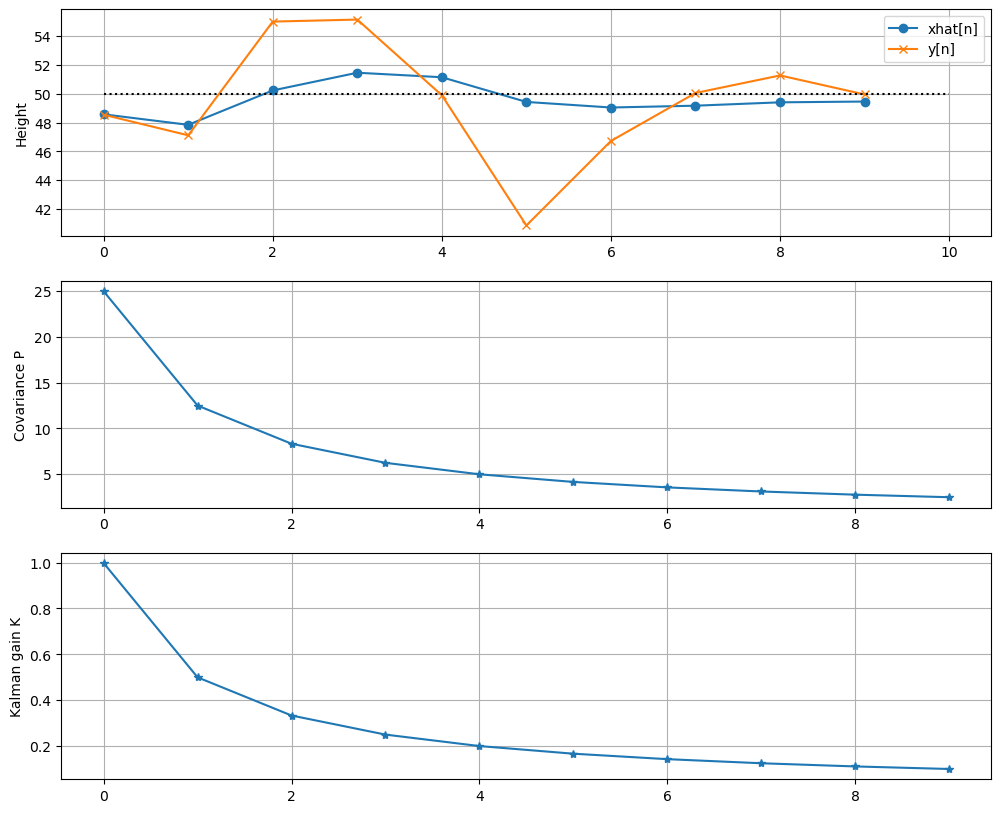

In [20]:
# Measurement vector
y = np.array([48.54, 47.11, 55.01, 55.15, 49.89, 40.85, 46.72, 50.05, 51.27, 49.95])

# TODO: Kalman Filter
A = np.array([[1]], dtype=float)
B = np.array([[0]], dtype=float)
C = np.array([[1]], dtype=float)
x0 = np.array([[60]], dtype=float)
P0 = np.array([[10**4]], dtype=float)
R = 25
Q = 0

kf = KalmanFilter(A, B, C, Q, R, x0, P0)

xhat = np.zeros_like(y)
P = np.zeros_like(y)
K = np.zeros_like(y)

for n in range(len(y)):
    kf.kalman_update(y[n], 0)
    xhat[n] = kf.x[0,0]
    P[n] = kf.P[0,0]
    K[n] = kf.K[0,0]

# Visualization
plt.figure(1, figsize=(12,10))
plt.subplot(311)
plt.plot(xhat, '-o')
plt.plot(y, '-x')
plt.hlines(50, 0, len(xhat), 'k', ':')
plt.ylabel('Height')
plt.grid(True)
plt.legend(["xhat[n]", 'y[n]'])

plt.subplot(312)
plt.plot(P, '-*')
plt.ylabel('Covariance P')
plt.grid(True)

plt.subplot(313)
plt.plot(K, '-*')
plt.ylabel('Kalman gain K')
plt.grid(True)
plt.show()

### Aufgabe 2: Temperatur-Messung in einem Tank

50.32969910795797
0.060840464812033215
0.04551881495331506


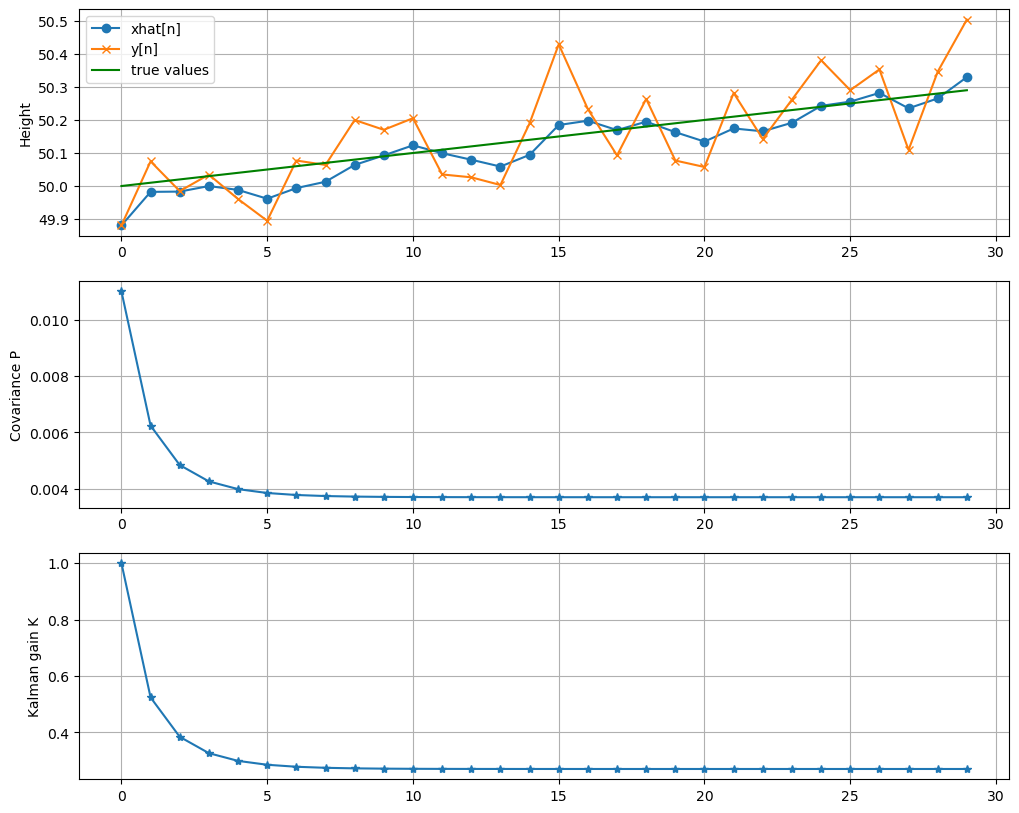

In [31]:
# Measurement vector
y = np.array([49.8807, 50.0747, 49.9846, 50.0346, 49.9607, 49.8949, 50.0772,
              50.0638, 50.1999, 50.1702, 50.2053, 50.0351, 50.0264, 50.0031,
              50.1898, 50.4289, 50.2328, 50.0927, 50.2637, 50.0772, 50.0576,
              50.2817, 50.1422, 50.2616, 50.3807, 50.2901, 50.3530, 50.1094,
              50.3462, 50.5039])
sigma = 0.1

# true values
N = 30
x = np.arange(N)
T = 50 + 0.3*x/N

# Kalman Filter
A = np.array([[1]], dtype=float)
B = np.array([[0]], dtype=float)
C = np.array([[1]], dtype=float)
x0 = np.array([[10]], dtype=float)
P0 = np.array([[10000]], dtype=float)
R = sigma**2
Q = 0.001

kf = KalmanFilter(A, B, C, Q, R, x0, P0)

xhat = np.zeros_like(y)
P = np.zeros_like(y)
K = np.zeros_like(y)

for n in range(len(y)):
    kf.kalman_update(y[n], 0)
    xhat[n] = kf.x[0,0]
    P[n] = kf.P[0,0]
    K[n] = kf.K[0,0]

print(xhat[29])
print(np.sqrt(P[29]))
print(np.sqrt(np.mean((T-xhat)**2)))

# Visualization
plt.figure(1, figsize=(12,10))
plt.subplot(311)
plt.plot(xhat, '-o')
plt.plot(y, '-x')
plt.plot(T, '-g')
plt.ylabel('Height')
plt.grid(True)
plt.legend(["xhat[n]", 'y[n]', 'true values'])

plt.subplot(312)
plt.plot(P, '-*')
plt.ylabel('Covariance P')
plt.grid(True)

plt.subplot(313)
plt.plot(K, '-*')
plt.ylabel('Kalman gain K')
plt.grid(True)
plt.show()

Mit modeliertem Temperatur-Drift

50.3535289483567
0.037447216722222
0.0734193370801395


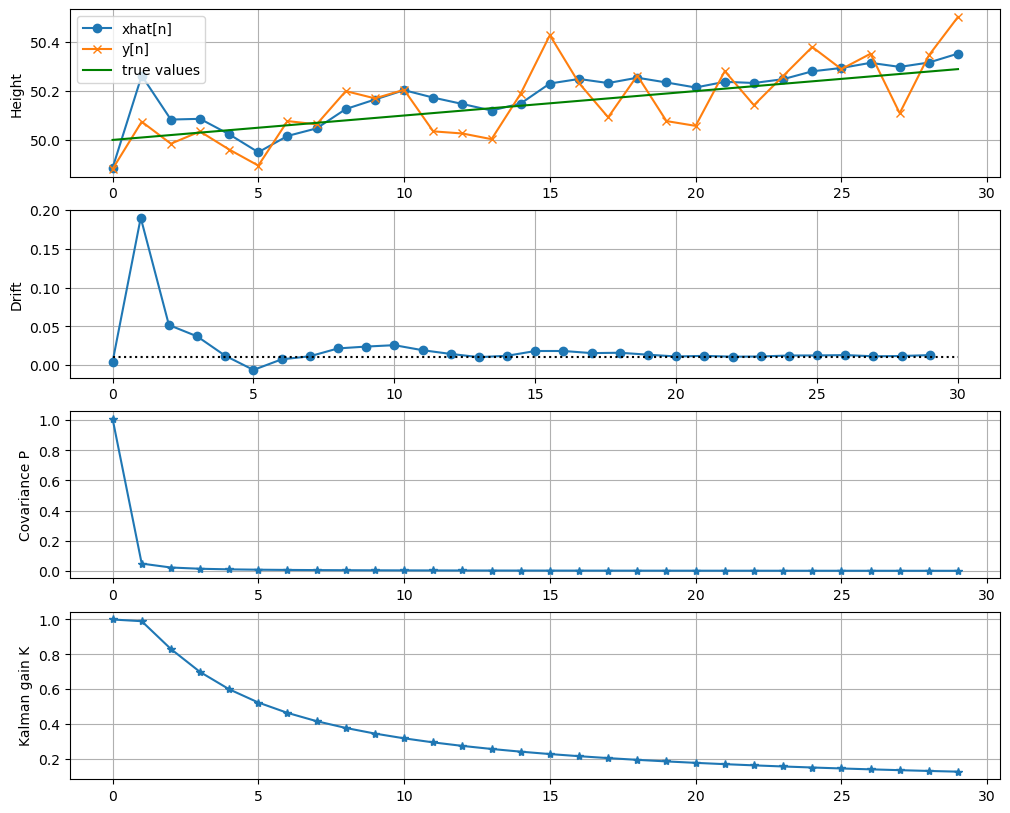

In [40]:
# Measurement vector
y = np.array([49.8807, 50.0747, 49.9846, 50.0346, 49.9607, 49.8949, 50.0772,
              50.0638, 50.1999, 50.1702, 50.2053, 50.0351, 50.0264, 50.0031,
              50.1898, 50.4289, 50.2328, 50.0927, 50.2637, 50.0772, 50.0576,
              50.2817, 50.1422, 50.2616, 50.3807, 50.2901, 50.3530, 50.1094,
              50.3462, 50.5039])
sigma = 0.1

# true values
N = 30
x = np.arange(N)
T = 50 + 0.3*x/N

# Kalman Filter
A = np.array([[1, 1],
              [0, 1]], dtype=float)
B = np.array([[0]], dtype=float)
C = np.array([[1, 0]], dtype=float)
x0 = np.array([[10], [0]], dtype=float)
P0 = A @ np.diag([10000, 1]) @ A.T
R = sigma**2
Q = 0.000

kf = KalmanFilter(A, B, C, Q, R, x0, P0)

xhat = np.zeros_like(y)
dhat = np.zeros_like(y)
P = np.zeros_like(y)
K = np.zeros_like(y)

for n in range(len(y)):
    kf.kalman_update(y[n], 0)
    xhat[n] = kf.x[0,0]
    dhat[n] = kf.x[1,0]
    P[n] = kf.P[0,0]
    K[n] = kf.K[0,0]

print(xhat[29])
print(np.sqrt(P[29]))
print(np.sqrt(np.mean((T-xhat)**2)))

# Visualization
plt.figure(1, figsize=(12,10))
plt.subplot(411)
plt.plot(xhat, '-o')
plt.plot(y, '-x')
plt.plot(T, '-g')
plt.ylabel('Height')
plt.grid(True)
plt.legend(["xhat[n]", 'y[n]', 'true values'])

plt.subplot(412)
plt.plot(dhat, '-o')
plt.ylabel('Drift')
plt.hlines(0.3/N, 0, len(xhat), 'k', ':')
plt.grid(True)

plt.subplot(413)
plt.plot(P, '-*')
plt.ylabel('Covariance P')
plt.grid(True)

plt.subplot(414)
plt.plot(K, '-*')
plt.ylabel('Kalman gain K')
plt.grid(True)
plt.show()